In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [18]:
data_dir = "/Volumes/TBHD_share/valencia/pipelines/woltka/classify/results"
species_data = os.path.join(data_dir, "species.tsv")
genus_data = os.path.join(data_dir, "genus.tsv")

In [19]:
sdf = pd.read_csv(species_data, sep="\t", names=["FeatureID", "Count", "Species"], header=0, index_col=2)
gdf = pd.read_csv(genus_data, sep="\t", names=["FeatureID", "Count", "Genus"], header=0, index_col=2)

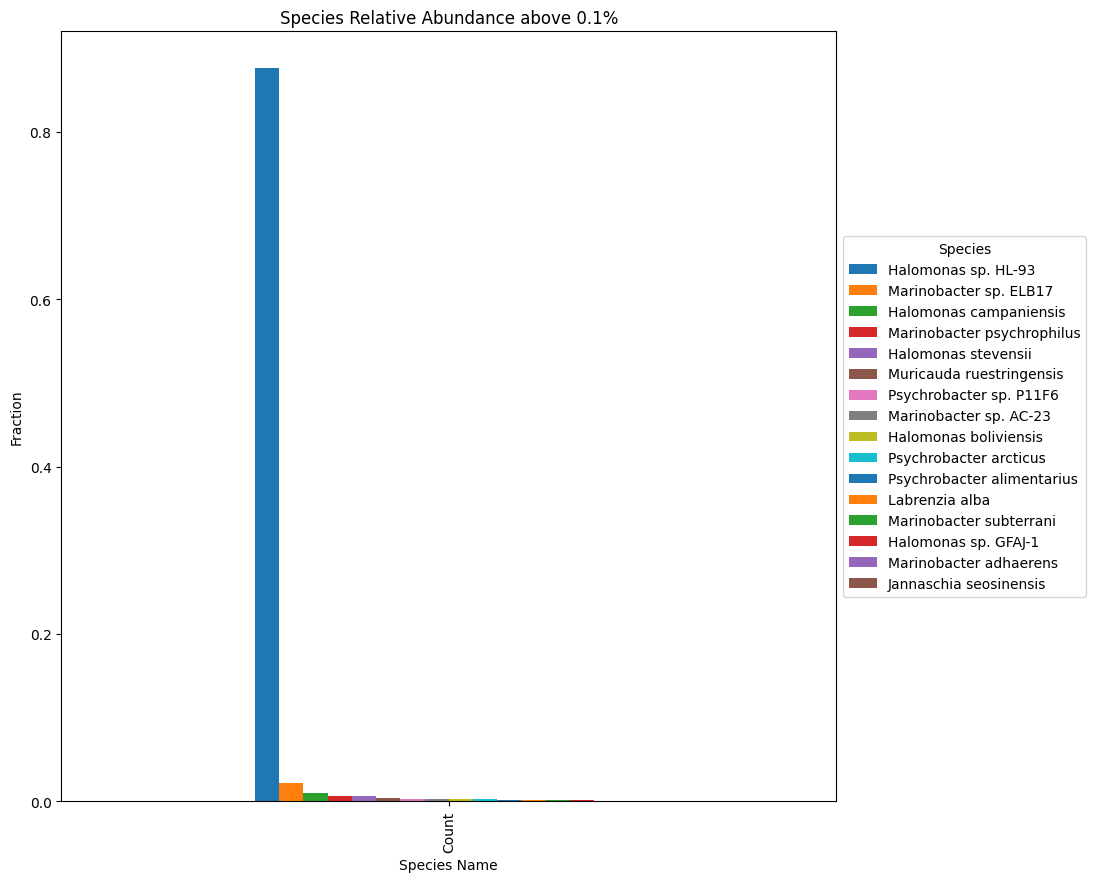

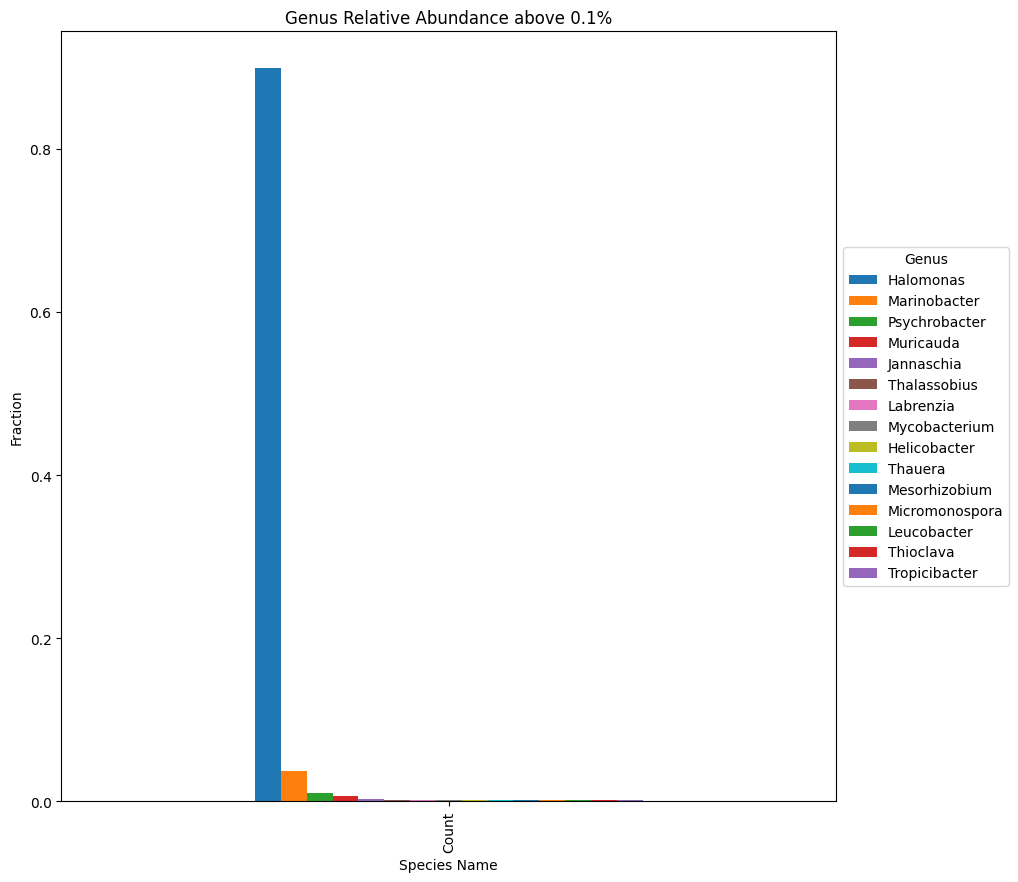

In [20]:
def rel_abundance(df, output, rank):
    df.drop("FeatureID", axis=1, inplace=True)
    pct = df[["Count"]].apply(lambda x: x / x.sum(), axis=0)
    pct = pct.sort_values(by="Count", ascending=False)
    pct.to_csv(output + ".csv", sep=",")
    pct = pct.where(pct > 0.001).dropna()

    pct.T.plot.bar(figsize=(10,10), xlabel="Species Name", ylabel="Fraction", title=f"{rank} Relative Abundance above 0.1%").legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title=f"{rank}")
    plt.savefig(output + ".png", bbox_inches='tight')

rel_abundance(sdf, "pipelines/woltka/species_rel_abundance", "Species")
rel_abundance(gdf, "pipelines/woltka/genus_rel_abundance", "Genus")